In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
import statistics
from scipy.stats import chi2_contingency

In [366]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [367]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [368]:
data.shape

(5110, 12)

In [369]:
#removing id column as it is being random
data.drop(['id'], axis = 1, inplace=True)

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [371]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [372]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [373]:
data['bmi'].mean()

28.893236911794673

In [374]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [375]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [376]:
# EDA 

In [377]:
 #Pearson correlation

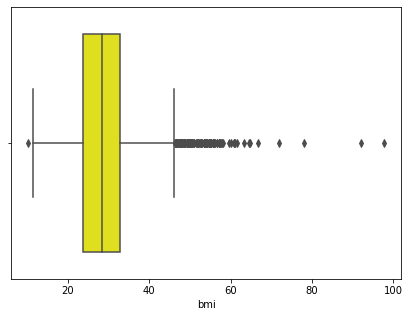

In [378]:
plt.figure(figsize=(7,5))
sns.boxplot(x='bmi',data=data, color = 'yellow')
plt.savefig('bmi')

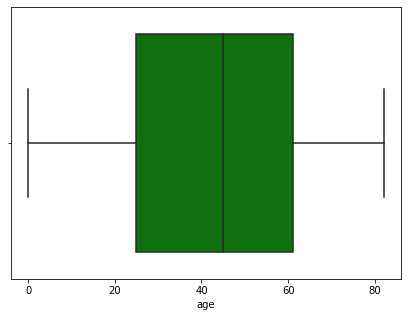

In [379]:
plt.figure(figsize=(7,5))
sns.boxplot(x='age',data=data , color = 'green')
plt.savefig('age')

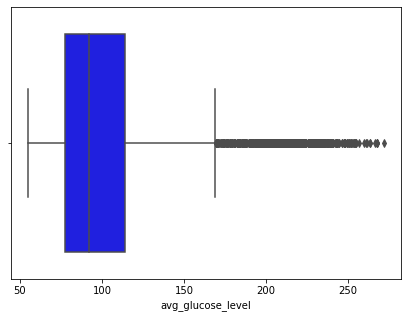

In [380]:
plt.figure(figsize=(7,5))
sns.boxplot(x='avg_glucose_level',data=data, color='blue')
plt.savefig('glu')

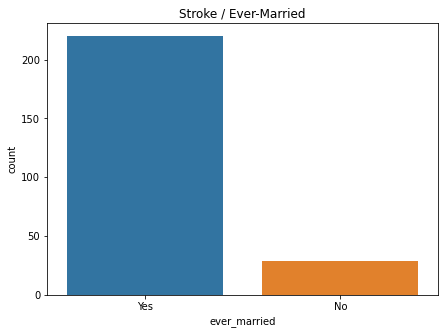

In [381]:
plt.figure(figsize=(7,5))
stroke = data.loc[data['stroke']==1]
sns.countplot(data=stroke,x='ever_married')
plt.title("Stroke / Ever-Married")
plt.savefig('marry')

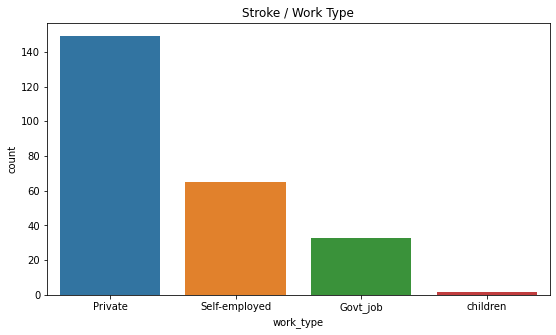

In [383]:
plt.figure(figsize=(9,5))
stroke = data.loc[data['stroke']==1]
sns.countplot(data=stroke,x='work_type')
plt.title("Stroke / Work Type")
plt.savefig('work')

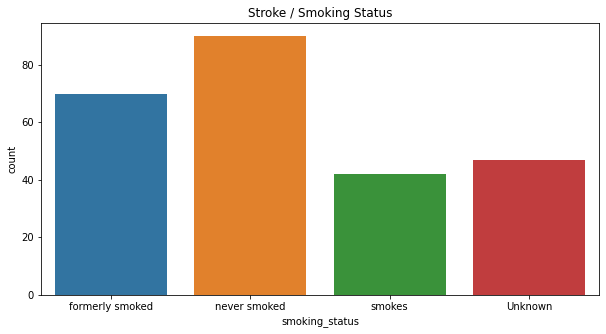

In [384]:
plt.figure(figsize=(10,5))
stroke = data.loc[data['stroke']==1]
sns.countplot(data=stroke,x='smoking_status')
plt.title("Stroke / Smoking Status")
plt.savefig('smoke')

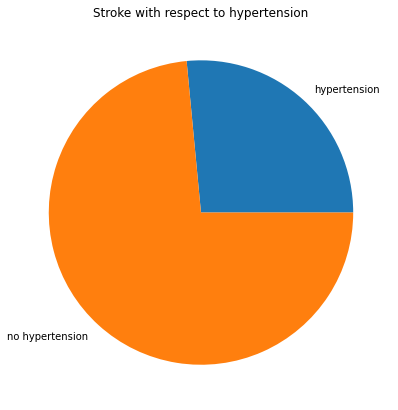

In [385]:
plt.figure(figsize =(10, 7))
stroke = data.loc[data['stroke']==1]
hyper = [len(stroke.loc[stroke['hypertension']==1]),len(stroke.loc[stroke['hypertension']==0])]
plt.pie(hyper, labels = ['hypertension','no hypertension'])
plt.title("Stroke with respect to hypertension")
plt.savefig('hyper')

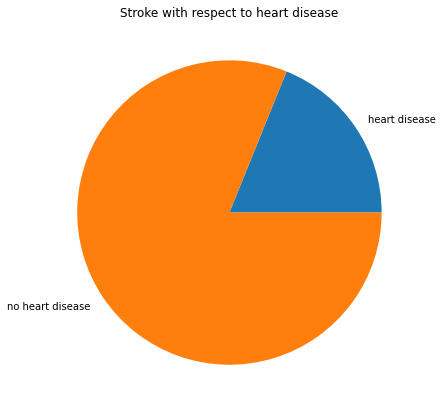

In [386]:
plt.figure(figsize =(10, 7))
stroke = data.loc[data['stroke']==1]
hyper = [len(stroke.loc[stroke['heart_disease']==1]),len(stroke.loc[stroke['heart_disease']==0])]
plt.pie(hyper, labels = ['heart disease','no heart disease'])
plt.title("Stroke with respect to heart disease")
plt.savefig('geart')

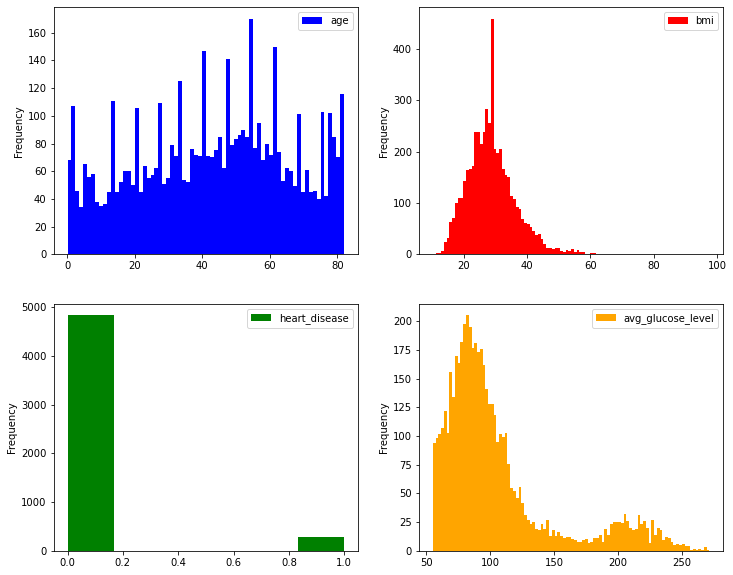

<Figure size 432x288 with 0 Axes>

In [387]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
data.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
data.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
data.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
data.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()
plt.savefig('quad')

In [311]:
#DATA PREPROCESSING

In [312]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [313]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [314]:
data['ever_married'].unique()
residence = {'Urban': 0, 'Rural': 1}
data['Residence_type'] = data['Residence_type'].map(residence)

In [315]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,0,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,1,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,1,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,0,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,1,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,0,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,0,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,1,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,1,166.29,25.600000,formerly smoked,0


In [316]:
data['Residence_type'].unique()
marriage = {'No': 0, 'Yes': 1}
data['ever_married'] = data['ever_married'].map(marriage)

In [317]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,0,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,1,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,1,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,0,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,1,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,0,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,0,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,1,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,1,Private,1,166.29,25.600000,formerly smoked,0


In [318]:
# DUMMY ENCODER

In [319]:
dummy = OneHotEncoder()

In [320]:
data['gender'] = pd.Categorical(data['gender'])
Dummy_gender = pd.get_dummies(data['gender'], prefix = 'encoded')
Dummy_gender

,encoded_Female,encoded_Male,encoded_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [321]:
data['work_type'] = pd.Categorical(data['work_type'])
Dummy_worktype = pd.get_dummies(data['work_type'], prefix = 'encoded')
Dummy_worktype

,encoded_Govt_job,encoded_Never_worked,encoded_Private,encoded_Self-employed,encoded_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [322]:
data['smoking_status'] = pd.Categorical(data['smoking_status'])
Dummy_smokingstatus = pd.get_dummies(data['smoking_status'], prefix = 'encoded')
Dummy_smokingstatus

,encoded_Unknown,encoded_formerly smoked,encoded_never smoked,encoded_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [323]:
data.drop("gender", axis=1, inplace=True)
data.drop("work_type", axis=1, inplace=True)
data.drop("smoking_status", axis=1, inplace=True)

In [324]:
data = pd.concat([data, Dummy_gender], axis=1)
data = pd.concat([data, Dummy_worktype], axis=1)
data = pd.concat([data, Dummy_smokingstatus], axis=1)
data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,encoded_Female,encoded_Male,encoded_Other,encoded_Govt_job,encoded_Never_worked,encoded_Private,encoded_Self-employed,encoded_children,encoded_Unknown,encoded_formerly smoked,encoded_never smoked,encoded_smokes
0,67.0,0,1,1,0,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,1,202.21,28.893237,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,1,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,0,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,1,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,0,83.75,28.893237,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,0,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,1,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,1,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,0


In [325]:
#TRAIN TEST SPLIT

In [326]:
target = data["stroke"]
feature = data.drop(['stroke'],axis=1)

In [327]:
feature

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,encoded_Female,encoded_Male,encoded_Other,encoded_Govt_job,encoded_Never_worked,encoded_Private,encoded_Self-employed,encoded_children,encoded_Unknown,encoded_formerly smoked,encoded_never smoked,encoded_smokes
0,67.0,0,1,1,0,228.69,36.600000,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,1,202.21,28.893237,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,1,105.92,32.500000,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,0,171.23,34.400000,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,1,174.12,24.000000,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,0,83.75,28.893237,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,0,125.20,40.000000,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,1,82.99,30.600000,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,1,166.29,25.600000,0,1,0,0,0,1,0,0,0,1,0,0


In [328]:
target

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [329]:
cor =dict()
for i in feature.columns:
    corr, _t = pearsonr(target, feature[i])
    cor[i] = corr
#print('Pearsons correlation: %.3f' % corr)

In [391]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [392]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
# NULL HYPOTHESIS TESTING

In [ ]:
# level of confidence (alpha = 0.001)

In [ ]:
#null hypothesis = " hypertension and stroke are dependent"
#alternate hypothesis = 'hyper tension and stroke are not dependent.'

In [399]:
data['hypertension']
data['stroke']
htp_strp = len(data[(data['hypertension']==1) & (data['stroke']==1)])

In [400]:
htp_strn = len(data[(data['hypertension']==1) & (data['stroke']==0)])

In [401]:
htn_strp = len(data[(data['hypertension']==0) & (data['stroke']==1)])

In [402]:
htpn_strn = len(data[(data['hypertension']==0) & (data['stroke']==0)])

In [411]:
a = [htp_strp,htp_strn]
b = [htn_strp, htpn_strn]

In [412]:
c =[a,b]

In [413]:
c

[[66, 432], [183, 4429]]

In [414]:
stat, p,dof,expected = chi2_contingency(c)

In [415]:
p

1.661621901511823e-19

In [410]:
if(p<0.001):
    print('null hypothesis is rejected')
else:
    print('null hypothesis is accepted')

null hypothesis is rejected


In [330]:
cor

{'age': 0.2452573461709748,
 'hypertension': 0.12790382346648038,
 'heart_disease': 0.13491399696869283,
 'ever_married': 0.10833974165701019,
 'Residence_type': -0.015457965477256957,
 'avg_glucose_level': 0.13194544082571016,
 'bmi': 0.03894659651202003,
 'encoded_Female': -0.009026602170652232,
 'encoded_Male': 0.009117154023008658,
 'encoded_Other': -0.003166422855664966,
 'encoded_Govt_job': 0.0026767045331463485,
 'encoded_Never_worked': -0.014882457537542752,
 'encoded_Private': 0.011888235156031489,
 'encoded_Self-employed': 0.062168257271196445,
 'encoded_children': -0.08386926606516618,
 'encoded_Unknown': -0.055891709388241236,
 'encoded_formerly smoked': 0.06455557529819726,
 'encoded_never smoked': -0.004128687879042863,
 'encoded_smokes': 0.008939203206269973}

In [331]:
train_feature,test_feature,train_target,test_target=train_test_split(feature,target,test_size=0.25,random_state=101)

In [332]:
#CLASSIFIER MODELS

In [336]:
Counter(target)

Counter({1: 249, 0: 4861})

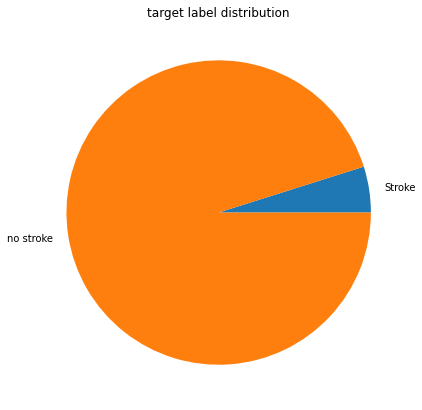

In [389]:
plt.figure(figsize =(10, 7))

plt.pie([249,4861], labels = ['Stroke','no stroke'])
plt.title("target label distribution")
plt.savefig('label')

In [335]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report,average_precision_score

In [333]:
test_target.value_counts()

0    1208
1      70
Name: stroke, dtype: int64

In [253]:
#logistic regression classification
LogReg=LogisticRegression()
LogReg.fit(train_feature,train_target)
logit_predict=LogReg.predict(test_feature)
print(classification_report(test_target,logit_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278

C:\Users\Abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Abi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

In [256]:
 #decision tree classifier
 dtc=DecisionTreeClassifier(random_state=0)
 dtc=dtc.fit(train_feature,train_target)
 tree_pred=dtc.predict(test_feature)
 print(classification_report(test_target,tree_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1208
           1       0.16      0.17      0.17        70

    accuracy                           0.91      1278
   macro avg       0.56      0.56      0.56      1278
weighted avg       0.91      0.91      0.91      1278



In [257]:
#xgboost
xgb = GradientBoostingClassifier(random_state=0)
xgb.fit(train_feature,train_target)
xgb_pred=xgb.predict(test_feature)
print(classification_report(test_target,xgb_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.94      0.92      1278



In [258]:
#extra tree classifier
etc=ExtraTreesClassifier(n_estimators=100,random_state=0)
etc.fit(train_feature,train_target)
extratree_pred=etc.predict(test_feature)
print(classification_report(test_target,extratree_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1208
           1       0.29      0.07      0.11        70

    accuracy                           0.94      1278
   macro avg       0.62      0.53      0.54      1278
weighted avg       0.91      0.94      0.92      1278



In [262]:
#oversampling method
#os = oversampling
os=SMOTE(random_state=2)
train_feature_os,train_target_os= os.fit_sample(train_feature,train_target)

In [283]:
Counter(train_target)

Counter({0: 3653, 1: 179})

In [285]:
Counter(train_target_os)

Counter({0: 3653, 1: 3653})

In [287]:
len(train_feature_os)

7306

In [288]:
LogReg_os=LogisticRegression()
LogReg_os.fit(train_feature_os,train_target_os)
logit_predict_os=LogReg_os.predict(test_feature)
print(classification_report(test_target,logit_predict_os))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1208
           1       0.28      0.21      0.24        70

    accuracy                           0.93      1278
   macro avg       0.62      0.59      0.60      1278
weighted avg       0.92      0.93      0.92      1278

C:\Users\Abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [263]:
#decision tree classifier
dtc_os=DecisionTreeClassifier()
dtc_os.fit(train_feature_os,train_target_os)
tree_pred_os=dtc_os.predict(test_feature)
print(classification_report(test_target,tree_pred_os))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1208
           1       0.14      0.17      0.15        70

    accuracy                           0.90      1278
   macro avg       0.54      0.55      0.55      1278
weighted avg       0.91      0.90      0.90      1278



In [264]:
#xgboost
xgb_os = GradientBoostingClassifier(random_state=0)
xgb_os.fit(train_feature_os,train_target_os)
xgb_pred_os=xgb_os.predict(test_feature)
print(classification_report(test_target,xgb_pred_os))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1208
           1       0.16      0.06      0.08        70

    accuracy                           0.93      1278
   macro avg       0.55      0.52      0.52      1278
weighted avg       0.90      0.93      0.92      1278



In [265]:
#extra tree classifier
etc_os=ExtraTreesClassifier(n_estimators=100,random_state=0)
etc_os.fit(train_feature_os,train_target_os)
extratree_pred_os=etc_os.predict(test_feature)
print(classification_report(test_target,extratree_pred_os))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1208
           1       0.19      0.07      0.10        70

    accuracy                           0.93      1278
   macro avg       0.57      0.53      0.53      1278
weighted avg       0.91      0.93      0.92      1278



In [277]:
#under-sampling
#us- under sampling
us =NearMiss()
train_feature_us,train_target_us=  us.fit_sample(train_feature,train_target)

In [278]:
Counter(train_target)

Counter({0: 3653, 1: 179})

In [279]:
Counter(train_target_us)

Counter({0: 179, 1: 179})

In [282]:
len(train_feature_us)

358

In [267]:
#logistic reg
LogReg_us=LogisticRegression()
LogReg_us.fit(train_feature_us,train_target_us)
logit_predict_us=LogReg_us.predict(test_feature)
print(classification_report(test_target,logit_predict_us))

              precision    recall  f1-score   support

           0       0.93      0.40      0.56      1208
           1       0.04      0.49      0.08        70

    accuracy                           0.40      1278
   macro avg       0.49      0.44      0.32      1278
weighted avg       0.88      0.40      0.53      1278

C:\Users\Abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [268]:
#decision tree classifier
dtc_us=DecisionTreeClassifier()
dtc_us.fit(train_feature_us,train_target_us)
tree_pred_us=dtc_us.predict(test_feature)
print(classification_report(test_target,tree_pred_us))

              precision    recall  f1-score   support

           0       0.93      0.32      0.47      1208
           1       0.05      0.61      0.09        70

    accuracy                           0.33      1278
   macro avg       0.49      0.47      0.28      1278
weighted avg       0.89      0.33      0.45      1278



In [269]:
#xgboost
xgb_us = GradientBoostingClassifier(random_state=0)
xgb_us.fit(train_feature_us,train_target_us)
xgb_pred_us=xgb_us.predict(test_feature)
print(classification_report(test_target,xgb_pred_us))

              precision    recall  f1-score   support

           0       0.93      0.28      0.43      1208
           1       0.05      0.66      0.09        70

    accuracy                           0.30      1278
   macro avg       0.49      0.47      0.26      1278
weighted avg       0.89      0.30      0.41      1278



In [270]:
#extra tree classifier
etc_us=ExtraTreesClassifier(n_estimators=100,random_state=0)
etc_us.fit(train_feature_us,train_target_us)
extratree_pred_us=etc_us.predict(test_feature)
print(classification_report(test_target,extratree_pred_us))

              precision    recall  f1-score   support

           0       0.93      0.40      0.56      1208
           1       0.05      0.50      0.08        70

    accuracy                           0.40      1278
   macro avg       0.49      0.45      0.32      1278
weighted avg       0.88      0.40      0.53      1278



In [348]:
perf_mat =dict()
perf_mat['Model'] =['Logistic Regression','Decision Tree Classifier','XGBoost Classifier','Extra Tree Classifier']


perf_mat['precision'] = [precision_score(test_target,logit_predict),precision_score(test_target,tree_pred),precision_score(test_target,xgb_pred),precision_score(test_target,extratree_pred)]

perf_mat['recall'] = [recall_score(test_target,logit_predict),recall_score(test_target,tree_pred),recall_score(test_target,xgb_pred),recall_score(test_target,extratree_pred)]

perf_mat['F1'] = [f1_score(test_target,logit_predict),f1_score(test_target,tree_pred),f1_score(test_target,xgb_pred),f1_score(test_target,extratree_pred)]

perf_mat['accuracy'] = [accuracy_score(test_target,logit_predict),accuracy_score(test_target,tree_pred),accuracy_score(test_target,xgb_pred),accuracy_score(test_target,extratree_pred)]

C:\Users\Abi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [349]:
perf_mat

{'Model': ['Logistic Regression',
  'Decision Tree Classifier',
  'XGBoost Classifier',
  'Extra Tree Classifier'],
 'precision': [0.0, 0.16216216216216217, 0.0, 0.29411764705882354],
 'recall': [0.0, 0.17142857142857143, 0.0, 0.07142857142857142],
 'F1': [0.0, 0.16666666666666669, 0.0, 0.11494252873563217],
 'accuracy': [0.945226917057903,
  0.9061032863849765,
  0.9436619718309859,
  0.9397496087636933]}

In [350]:
perf1 = pd.DataFrame(perf_mat)

In [352]:
perf1

,Model,precision,recall,F1,accuracy
0,Logistic Regression,0.000000,0.000000,0.000000,0.945227
1,Decision Tree Classifier,0.162162,0.171429,0.166667,0.906103
2,XGBoost Classifier,0.000000,0.000000,0.000000,0.943662
3,Extra Tree Classifier,0.294118,0.071429,0.114943,0.939750


In [353]:
perf_ =dict()
perf_['Model'] =['Logistic Regression','Decision Tree Classifier','XGBoost Classifier','Extra Tree Classifier']


perf_['precision'] = [precision_score(test_target,logit_predict_os),precision_score(test_target,tree_pred_os),precision_score(test_target,xgb_pred_os),precision_score(test_target,extratree_pred_os)]

perf_['recall'] = [recall_score(test_target,logit_predict_os),recall_score(test_target,tree_pred_os),recall_score(test_target,xgb_pred_os),recall_score(test_target,extratree_pred_os)]

perf_['F1'] = [f1_score(test_target,logit_predict_os),f1_score(test_target,tree_pred_os),f1_score(test_target,xgb_pred_os),f1_score(test_target,extratree_pred_os)]

perf_['accuracy'] = [accuracy_score(test_target,logit_predict_os),accuracy_score(test_target,tree_pred_os),accuracy_score(test_target,xgb_pred_os),accuracy_score(test_target,extratree_pred_os)]

In [354]:
perf2 = pd.DataFrame(perf_)

In [355]:
perf2

,Model,precision,recall,F1,accuracy
0,Logistic Regression,0.283019,0.214286,0.243902,0.927230
1,Decision Tree Classifier,0.136364,0.171429,0.151899,0.895149
2,XGBoost Classifier,0.160000,0.057143,0.084211,0.931925
3,Extra Tree Classifier,0.192308,0.071429,0.104167,0.932707
